In [1]:
import torch
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Device and Availability

Big Advantage of Pytorch is use of GPUs and parallel computing. Can configure to set this up

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)    
# create a tensor on a specific device
tensor = torch.tensor([1,2,3], device=device)
tensor

# Tensors
Vectors and matrices in Pytorch
https://pytorch.org/docs/stable/tensors.html

Can create matrices in variety of ways - directly from data in numpy array, or using built in functions

In [4]:
py_data = [[1,2],[3,4]]
numpy_data = np.arange(25).reshape(5,5)
torch.tensor(py_data)

tensor([[1, 2],
        [3, 4]])

In [5]:
torch.tensor(numpy_data)

tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24]])

In [8]:
# can use any numpy operation that we know to manipulate data (including pandas to_numpy) and then easily convert to torch
tensor = torch.tensor(numpy_data)
torch.from_numpy(numpy_data)
tensor.numpy()

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [7]:
torch.ones(2,4)
torch.zeros(8,5)
torch.rand(100) # ~ U(0,1)

tensor([0.9967, 0.8227, 0.5905, 0.2501, 0.7357, 0.0499, 0.3268, 0.7413, 0.7717,
        0.4723, 0.2762, 0.9158, 0.6427, 0.5116, 0.7597, 0.5221, 0.7795, 0.6492,
        0.6719, 0.4391, 0.2111, 0.2750, 0.4727, 0.9140, 0.4273, 0.8922, 0.6939,
        0.4989, 0.3159, 0.5247, 0.7652, 0.6031, 0.9895, 0.4795, 0.0058, 0.8762,
        0.4059, 0.6753, 0.1402, 0.7792, 0.1586, 0.7856, 0.8772, 0.7502, 0.9344,
        0.0074, 0.8616, 0.6199, 0.0728, 0.6369, 0.7060, 0.5105, 0.4353, 0.8400,
        0.6635, 0.9404, 0.9963, 0.2381, 0.7542, 0.2255, 0.4637, 0.4364, 0.7828,
        0.3694, 0.0781, 0.2432, 0.6840, 0.4969, 0.9183, 0.8366, 0.4184, 0.4450,
        0.9796, 0.4651, 0.1543, 0.7563, 0.8801, 0.1240, 0.0881, 0.1118, 0.8342,
        0.7888, 0.8716, 0.1806, 0.9704, 0.3670, 0.1884, 0.6780, 0.3643, 0.7186,
        0.2718, 0.7496, 0.6019, 0.9638, 0.0460, 0.0661, 0.2092, 0.3416, 0.0899,
        0.8482])

In [10]:
# MANY NUMPY METHODS REIMPLEMENTED
torch.linspace(0,100,21)
torch.eye(3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [11]:
# COMBINING TENSORS
print(torch.concat((torch.eye(3),torch.eye(3)),dim=0),'\n')
print(torch.concat((torch.eye(3),torch.eye(3)),dim=1),'\n')

print(torch.column_stack((torch.tensor(np.arange(5)), torch.tensor(np.arange(5))+8)))
print(torch.column_stack((torch.zeros(2,2), torch.ones(2,2))))


tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]) 

tensor([[1., 0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0., 1.]]) 

tensor([[ 0,  8],
        [ 1,  9],
        [ 2, 10],
        [ 3, 11],
        [ 4, 12]])
tensor([[0., 0., 1., 1.],
        [0., 0., 1., 1.]])


### Tensor Properties- indexing, shape, 

In [12]:
tensor = torch.tensor(np.arange(25))
tensor = tensor.reshape(5,5)

In [13]:
print(torch.is_tensor(np.arange(5)))
print(type(tensor.shape))
print(len(tensor.shape))
tensor.shape

False
<class 'torch.Size'>
2


torch.Size([5, 5])

In [14]:
tensor.numel() # number of elements

25

In [15]:
tensor.device

device(type='cpu')

*To actually get the element, call .item(). Only works on one element tensors. Default return is tensor object*

In [16]:
print(tensor)
print(tensor[3,4])
print(tensor[3,4].item())

tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24]])
tensor(19)
19


In [22]:
tensor[:, [0,2,3]]

tensor([[ 0,  2,  3],
        [ 5,  7,  8],
        [10, 12, 13],
        [15, 17, 18],
        [20, 22, 23]])

In [17]:
print(tensor[1])
print(tensor[1][2].item())
tensor[:,[1,2]]

tensor([5, 6, 7, 8, 9])
7


tensor([[ 1,  2],
        [ 6,  7],
        [11, 12],
        [16, 17],
        [21, 22]])

In [18]:
tensor.T

tensor([[ 0,  5, 10, 15, 20],
        [ 1,  6, 11, 16, 21],
        [ 2,  7, 12, 17, 22],
        [ 3,  8, 13, 18, 23],
        [ 4,  9, 14, 19, 24]])

In [16]:
torch.tensor([[1-2j,3+1j],[-1j,5]]).adjoint()

tensor([[1.+2.j, -0.+1.j],
        [3.-1.j, 5.-0.j]])

## Operations

In [27]:
a = np.ones((3,3))
b = np.random.randn(3,3)
A = torch.ones(3,3, dtype=torch.float32)
B = torch.tensor(b, dtype=torch.float32)

print(np.dot(a,b))

A @ B
A.matmul(B)

[[ 2.32225895 -1.17775137  0.29755711]
 [ 2.32225895 -1.17775137  0.29755711]
 [ 2.32225895 -1.17775137  0.29755711]]


tensor([[ 2.3223, -1.1778,  0.2976],
        [ 2.3223, -1.1778,  0.2976],
        [ 2.3223, -1.1778,  0.2976]])

In [28]:
print(np.multiply(a,b))
A.mul(B)
A * B

[[ 1.50513732 -0.36558043  0.77582464]
 [ 0.70726606  0.87666619 -0.06560756]
 [ 0.10985557 -1.68883713 -0.41265998]]


tensor([[ 1.5051, -0.3656,  0.7758],
        [ 0.7073,  0.8767, -0.0656],
        [ 0.1099, -1.6888, -0.4127]])

In [29]:
A = torch.ones(3,3, dtype=torch.float32)
print(A + 5)
A.add(5)
A.add_(3) #inplace
A

tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]])


tensor([[4., 4., 4.],
        [4., 4., 4.],
        [4., 4., 4.]])

In [30]:
A.numpy()

array([[4., 4., 4.],
       [4., 4., 4.],
       [4., 4., 4.]], dtype=float32)

# GOATED: autograd

Gradients calculated for us for free by Pytorch!

Creates a computation graph: https://pytorch.org/blog/computational-graphs-constructed-in-pytorch/


Function Object: https://pytorch.org/docs/stable/autograd.html#function

In [8]:
#Firstly, not all functions are differentiable but PyTorch won't tell you!
# have to check with grad_fn, otw gradient just won't propagate
x = torch.randn(10,10, requires_grad=True)
out_diff = torch.sum(x, dim=1)
out_not_diff = torch.argmax(x, dim=1)

print(out_diff.grad_fn)
print(out_not_diff.grad_fn)

None


In [66]:
x = torch.randn(3, requires_grad=True) # tracks gradient, default False
print(x)

tensor([ 0.3079, -1.9239, -1.3591], requires_grad=True)


In [67]:
y = 2*x*x
y

tensor([0.1896, 7.4031, 3.6945], grad_fn=<MulBackward0>)

In [68]:
y.backward(torch.tensor([1,1,1]))

In [70]:
x.grad

tensor([ 1.2317, -7.6957, -5.4365])

In [23]:
z = torch.siny*y
z

tensor([12.3558,  9.7566,  0.4916], grad_fn=<MulBackward0>)

In the background, creating a vector Jacobian product

https://discuss.pytorch.org/t/vector-jacobian-product-calculation/79723

In [24]:
v = torch.tensor([0.1, 1.0, .001], dtype=torch.float32) # needed if output is not a scalar
z.backward(v) # dz/dx

# Calling backward() accumulates gradients in .grad attribute, summed up. Cannot call multiple times

In [25]:
print(x.grad) # 

tensor([1.4060e+00, 1.2494e+01, 2.8044e-03])


In [81]:
x = torch.randn(3, requires_grad=True)
y = torch.tensor([1.0,2.0,3.0], requires_grad=True)
z = 2*x + 3*y*y
z.backward(torch.tensor([1,1,1]))
print(x.grad)
print(y.grad)

tensor([2., 2., 2.])
tensor([ 6., 12., 18.])


In [82]:
x = x-x.grad

In [83]:
x.grad

In [80]:
y.grad

tensor([ 6., 12., 18.])

#### Not tracking certain operations in gradient- 3 options

In [26]:
x = torch.randn(3, requires_grad=True)
print(x)

tensor([-0.1208,  0.2652, -1.3234], requires_grad=True)


In [27]:
#1. requires_grad_(False)
x.requires_grad_(False)

tensor([-0.1208,  0.2652, -1.3234])

In [28]:
x = torch.randn(3, requires_grad=True)
y = x.detach()
y

tensor([ 0.0824, -1.0320, -0.6063])

In [29]:
with torch.no_grad():
    loss = x+2
    print(loss)

tensor([2.0824, 0.9680, 1.3937])


### Resetting gradient each loop- VERY IMPORTANT

In [30]:
weights = torch.randn(4, requires_grad=True)
for epoch in range(3):
    loss = (weights * 3).sum()
    loss.backward()
    print(weights.grad) #BAD! Not resetting

tensor([3., 3., 3., 3.])
tensor([6., 6., 6., 6.])
tensor([9., 9., 9., 9.])


In [63]:
weights = torch.randn(4, requires_grad=True)
for epoch in range(3):
    loss = (weights * 3).sum()
    loss.backward()
    print(weights.grad) #Good! Resetting
    weights.grad.zero_()

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


In [47]:
x = torch.ones(1,5) #input
y = torch.zeros(1,3) #expected output

W = torch.randn(5,3, requires_grad=True)
b = torch.randn(1,3, requires_grad = True)

z = torch.matmul(x,W)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z,y)

print(f"Gradient function for z = {z.grad_fn}")
print(f"Gradient function for loss = {loss.grad_fn}")

loss.backward()
print(W.grad)
print(b.grad)

Gradient function for z = <AddBackward0 object at 0x7f8c71d2f100>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x7f8c71d2f730>
tensor([[0.0026, 0.3047, 0.2663],
        [0.0026, 0.3047, 0.2663],
        [0.0026, 0.3047, 0.2663],
        [0.0026, 0.3047, 0.2663],
        [0.0026, 0.3047, 0.2663]])
tensor([[0.0026, 0.3047, 0.2663]])


# Datasets and Dataloaders

$\text{Datasets come from 2 places. torch has many built in datasets which one can iterate over and use.}\\
\text{Alternatively, can use base classes for custom dataset}$

Dataloaders are an iterator wrapper class over datasets. These are very supportive of batching. 

In [6]:
import torchvision
from torchvision import datasets

In [7]:
train = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform= torchvision.transforms.ToTensor()
)

test = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform= torchvision.transforms.ToTensor()
)

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}


In [8]:
train

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [10]:
X, y = train[0]
type(X)

torch.Tensor

In [36]:
test

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

Shape of image:  torch.Size([1, 28, 28])
Classification: 9, Ankle Boot


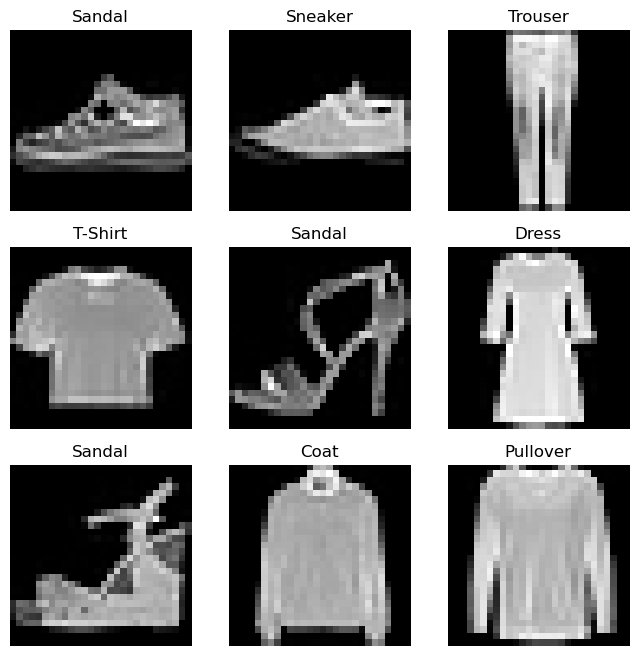

In [11]:
X, y = train[0]
print("Shape of image: ", X.shape)
print(f"Classification: {y}, {labels_map[y]}")
figure, cols, rows = plt.figure(figsize=(8,8)), 3, 3
for i in range(1, cols*rows+1):
    rand_index = torch.randint(len(train), size=(1,1)).item()
    X, y = train[rand_index]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[y])
    plt.axis("off")
    plt.imshow(X.squeeze(), cmap="gray")
plt.show()

## Transforms- used by all Datasets

https://pytorch.org/tutorials/beginner/basics/transforms_tutorial.html

Common Vision Transforms: 
https://pytorch.org/vision/stable/transforms.html

In [5]:
from torchvision import transforms 

https://matplotlib.org/stable/gallery/color/colormap_reference.html

In [76]:
def displayImage(image, transform=transforms.ToTensor(), cmap='gray'):
    figure = plt.figure(figsize=(4,4))
    plt.title(labels_map[image[1]])
    plt.axis("off")
    img = transform(image[0]).squeeze()
    plt.imshow(img, cmap=cmap)
    plt.show()

def displayRandomImage(batch, cmap='gray'):
    rand_index = torch.randint(len(batch), size=(1,1)).item()
    displayImage(batch[rand_index], cmap)
    

In [40]:
# without transform:
data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
)

print(type(data[0][0]))
print(type(transforms.ToTensor()(data[0][0])))

<class 'PIL.Image.Image'>
<class 'torch.Tensor'>


*Note that the input is itself a callable. Create ToTensor() and then call that on the data*

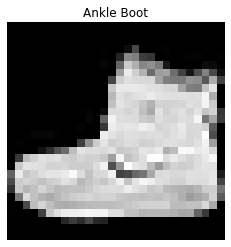

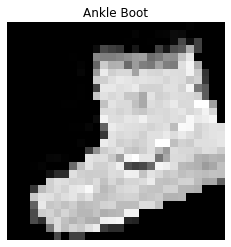

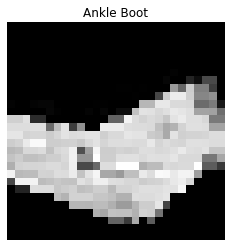

In [41]:
deg, shear = 100, 0
t = lambda d,s : transforms.Compose([transforms.RandomAffine(degrees=d, shear=s), transforms.ToTensor()])
displayImage(data[0])
displayImage(data[0], t(deg, shear))
displayImage(data[0], t(24, 50))

$\text{All datasets have transform and target_transform parameters to modify features and labels}$

### User Defined Lambda Transformations

In [11]:
one_hot = transforms.Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0,torch.tensor(y),value=1))

In [12]:
one_hot(1)

tensor([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [13]:
training_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=transforms.ToTensor(),
    target_transform = one_hot
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=transforms.ToTensor(),
    target_transform = one_hot
)



### Can define custom datasets that take in any file

In [9]:
from torch.utils.data import Dataset
import os
import torchvision
def CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        # constructor, run when instantiating object
        #expect annotations file to be csv of form image.jpg, label ...
        
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
        
    def __len__(self):
        return(len(self.img_labels))

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx,0])
        image = torchvision.io.read_image(img_path) # turns image into tensor
        label = self.img_labels.iloc[idx,1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            self.target_transform(label)
        return(image, label)

## Dataloaders- iterable wrapper for batches

torch.utils.data.DataLoader

In [14]:
from torch.utils.data import DataLoader

In [15]:
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data)

# Since we enabled shuffle, after each epoch, the data is shuffled into new batches

In [16]:
%%time
train_features, train_labels = next(iter(train_dataloader))

CPU times: user 74.5 ms, sys: 10.8 ms, total: 85.3 ms
Wall time: 30.4 ms


Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64, 10])


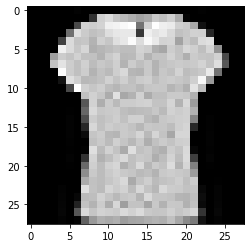

ValueError: only one element tensors can be converted to Python scalars

In [48]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
plt.imshow(img, cmap='gray')
plt.show()
print(f"Label: {train_labels[0]}", labels_map[train_labels[0].item()])

# Building Models- torch.nn and nn.Module

https://pytorch.org/docs/stable/nn.html

https://pytorch.org/docs/stable/generated/torch.nn.Module.html

https://pytorch.org/docs/stable/nn.functional.html

In [5]:
import os
import torch
import torch.nn as nn
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
device = "cuda" if torch.cuda.is_available() else "cpu"

In [59]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=transforms.ToTensor(),
    #target_transform = transforms.Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0,torch.tensor(y),value=1))
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=transforms.ToTensor(),
    #target_transform = transforms.Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0,torch.tensor(y),value=1))
)

training_dataloader = DataLoader(training_data, batch_size=64)
testing_dataloader = DataLoader(test_data, batch_size=64)


In [4]:
class ToyModel(nn.Module):
    def __init__(self):
        super().__init__()
    def forward(x):
        # forward function defines the computation DAG, dictates what autograd tracks
        # when we call backward(), weights for operations NOT in forward() are not updated
        # thus, any helper functions must be included in forward and during training need to do model()
        pass

NameError: name 'nn' is not defined

In [3]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        
        # Sequential is an ordered container of modules. Data passes through in defined order        
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(in_features=2, out_features=512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )
    def forward(self, x):
        logits = self.linear_relu_stack(self.flatten(x))
        return logits


In [4]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [5]:
X = torch.rand(1,28,28,device=device)
logits = model(X)
logits

tensor([[ 0.0730, -0.0172, -0.0086,  0.0491, -0.0672,  0.0596,  0.1117, -0.0014,
         -0.0435,  0.1060]], grad_fn=<AddmmBackward0>)

In [10]:
a0 = nn.Flatten()(X)
z1 = nn.Linear(in_features=28*28, out_features=512)(a0)
a1 = nn.ReLU()(z1)
print(z1.shape, a1.shape)

torch.Size([1, 512]) torch.Size([1, 512])
tensor([[ 7.4211e-01,  1.0066e-01, -1.2299e-01,  5.0884e-01, -5.4553e-01,
         -3.9699e-01,  3.6414e-03,  2.0253e-01,  2.2906e-01,  6.7656e-04,
          2.3477e-01, -2.1259e-01, -2.1517e-01,  2.8969e-01, -1.3611e-01,
         -3.0110e-01,  3.0337e-02, -4.2623e-01,  4.1202e-01, -3.4600e-01,
          1.7352e-01, -9.0075e-02,  3.8873e-01, -3.5193e-01,  4.8800e-02,
         -1.7110e-03, -3.1403e-01, -9.8036e-02, -3.8368e-01,  7.2706e-02,
          1.9573e-01,  3.7664e-01,  3.5651e-01, -1.0866e-01, -2.5642e-01,
          1.6068e-01,  5.5420e-01,  3.7279e-01, -4.6752e-01, -2.2059e-01,
          1.4836e-01,  6.4644e-01, -5.2557e-01, -1.8545e-01, -9.5784e-02,
          4.5407e-01,  3.1350e-01,  1.8782e-01, -1.7621e-01, -1.5706e-01,
         -4.1373e-01, -6.2536e-02, -1.2042e-01, -2.1667e-01, -5.1365e-01,
          4.2165e-02,  1.4034e-01,  5.4529e-01, -1.2014e-01,  4.4234e-01,
          7.1328e-02,  3.2284e-02,  1.4604e-01, -1.6352e-01,  3.4950e-

In [63]:
pred_probab = nn.Softmax(dim=1)(logits)
pred_probab

tensor([[0.0905, 0.1003, 0.1012, 0.0894, 0.0979, 0.0906, 0.1061, 0.1114, 0.1031,
         0.1096]], grad_fn=<SoftmaxBackward0>)

In [64]:
y_pred = pred_probab.argmax(1)
print(f"Prediction: {y_pred.item()}")

Prediction: 7


## Model Parameters

In [65]:
print(f"Model Structure: {model}\n\n")

for name, params in model.named_parameters():
    print(f"Layer: {name} | Size: {params.size()} | Values: {params[:2]}\n")

Model Structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values: tensor([[ 0.0160, -0.0266,  0.0207,  ..., -0.0042, -0.0250, -0.0217],
        [ 0.0211, -0.0091,  0.0136,  ...,  0.0216,  0.0223,  0.0053]],
       grad_fn=<SliceBackward0>)

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values: tensor([-0.0090, -0.0030], grad_fn=<SliceBackward0>)

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values: tensor([[ 0.0110, -0.0002, -0.0125,  ..., -0.0344,  0.0412, -0.0427],
        [ 0.0039, -0.0202,  0.0035,  ..., -0.0040,  0.0033, -0.0334]],
       grad_fn=<SliceBackward0>)

Layer: linear_relu_stack.2.bias | Size: 

## Training and Backprop- Autograd returns

In [66]:
# Hyperparameters
learning_rate = 1e-3
batch_size = 64
epochs = 5

select loss function from https://pytorch.org/docs/stable/nn.html#loss-functions

select optimizer from https://pytorch.org/docs/stable/optim.html

In [67]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
#optim2 = torch.optim.Adam([beta1, beta2], lr=0.0001)

In [68]:
def train_model(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    
    for batch, (X,y) in enumerate(dataloader):
        
        #calculations
        prediction = model(X)
        loss = loss_fn(prediction, y)
        # backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch % 100 == 0:
            loss, current = loss.item(), batch*len(X)
            print(f"loss: {loss:>6f} | {current:>5d}/{size:>5d}]")

def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0,0
    
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
        test_loss /= num_batches
        correct /= size
        print(f"Test Error: \n Accuracy: {100*correct:>0.1f}%, Avg Loss: {test_loss:>8f}\n")
        

In [69]:
epochs = 20
for t in range(epochs):
    print(f"Epoch number {t+1}\n---------------------------------\n")
    train_model(training_dataloader, model, loss_fn, optimizer)
    test_loop(testing_dataloader, model, loss_fn)
    

Epoch number 1
---------------------------------

loss: 2.307522 |     0/60000]
loss: 2.292364 |  6400/60000]
loss: 2.269739 | 12800/60000]
loss: 2.263754 | 19200/60000]
loss: 2.242522 | 25600/60000]
loss: 2.215466 | 32000/60000]
loss: 2.217119 | 38400/60000]
loss: 2.190886 | 44800/60000]
loss: 2.192634 | 51200/60000]
loss: 2.146128 | 57600/60000]
Test Error: 
 Accuracy: 44.9%, Avg Loss: 2.151504

Epoch number 2
---------------------------------

loss: 2.169459 |     0/60000]
loss: 2.159163 |  6400/60000]
loss: 2.099143 | 12800/60000]
loss: 2.118148 | 19200/60000]
loss: 2.061283 | 25600/60000]
loss: 1.999263 | 32000/60000]
loss: 2.030011 | 38400/60000]
loss: 1.955061 | 44800/60000]
loss: 1.964041 | 51200/60000]
loss: 1.884403 | 57600/60000]
Test Error: 
 Accuracy: 53.4%, Avg Loss: 1.891035

Epoch number 3
---------------------------------

loss: 1.931642 |     0/60000]
loss: 1.900127 |  6400/60000]
loss: 1.785064 | 12800/60000]
loss: 1.829164 | 19200/60000]
loss: 1.707371 | 25600/60000

## Save and Load the Model

In [70]:
import torch
import torchvision.models as models


In [71]:
model = models.vgg16(pretrained=True)
torch.save(model.state_dict(), 'model_weights.pth')


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /Users/samart/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

In [72]:
model = models.vgg16()
model.load_state_dict(torch.load('model_weights.pth'))
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

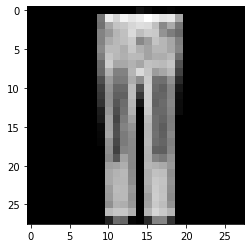

In [90]:
plt.imshow(testing_dataloader.dataset[15][0].flatten().reshape(28,28), cmap='gray')